#Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)
##María Fernanda Pérez Ruiz (A01742102)

Cargué las librerias necesarias para correr el modelo

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import warnings

Importé el archivo de Valhalla23.csv para visualizar la información con la que voy a trabajar. Obteniendo las columnas de grados en "Celsius" y "Valks". Siendo mi base de datos de 100 filas.

In [2]:
df = pd.read_csv('/content/Valhalla23.csv')
print(df.head(15))
print("Contiene", len(df), "filas")

    Celsius    Valks
0   61.4720 -139.740
1   70.5790 -156.600
2   -7.3013   73.269
3   71.3380 -165.420
4   43.2360  -75.835
5  -10.2460   83.437
6    7.8498   24.680
7   34.6880  -55.108
8   75.7510 -182.820
9   76.4890 -183.460
10  -4.2387   61.973
11  77.0590 -171.990
12  75.7170 -175.830
13  28.5380  -30.998
14  60.0280 -142.490
Contiene 100 filas


Grafiqué los datos reales del dataset

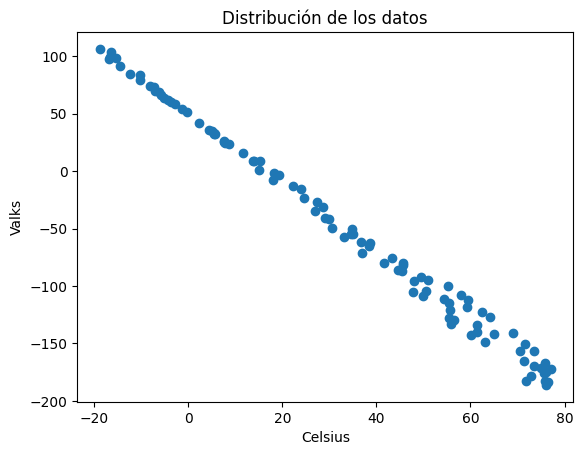

In [3]:
plt.scatter(df['Celsius'], df['Valks'])
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Distribución de los datos')
plt.show()

Definí la variable independiente (X) y dependiente (y) de esta manera ya que tiene más sentido convertir de Celcius (una medida de temperatura con la que si estamos familiarizados) a Vaks (medida de temperatura que desconocemos).

In [4]:
X = df[['Celsius']]  # independiente
Y = df['Valks']      # dependiente

Se divide el dataset en tres partes: 40% para entrenamiento, 40% para validación, y 20% para prueba.

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.6, random_state=2102)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2102)

 Se entrena un modelo de regresión lineal usando SGDRegressor con una tasa de aprendizaje fija ('constant') y  un máximo de iteraciones de un millón, que utiliza una tasa de aprendizaje de 1E-4 y los ultimos 4 digitos de mi matricula (2102) como semilla predefinida

In [6]:
modelo_base = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=2102)
modelo_base.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=1000000,
             random_state=2102)

Calculé el error cuadrático medio (MSE) de nuestro modelo base en los conjuntos de entrenamiento, validación y prueba. Este error  me servirá como comparación en las siguientes etapas.

In [7]:
mse_train = mean_squared_error(y_train, modelo_base.predict(X_train))
mse_val = mean_squared_error(y_val, modelo_base.predict(X_val))
mse_test = mean_squared_error(y_test, modelo_base.predict(X_test))

print("MSE Entrenamiento Base:", mse_train)
print("MSE Validación Base:", mse_val)
print("MSE Prueba Base:", mse_test)

MSE Entrenamiento Base: 949.3339349719503
MSE Validación Base: 1151.5723555670113
MSE Prueba Base: 1364.494989722558


Se grafica la dispersión de los datos de entrenamiento, validación y prueba, y la línea de regresión obtenida del modelo base.

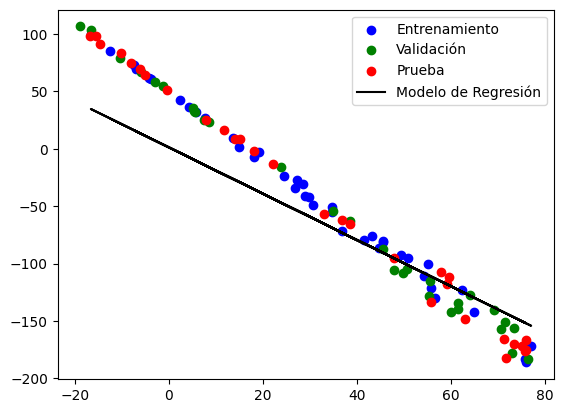

In [8]:
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_val, y_val, color='green', label='Validación')
plt.scatter(X_test, y_test, color='red', label='Prueba')
plt.plot(X_train, modelo_base.predict(X_train), color='black', label='Modelo de Regresión')
plt.legend()
plt.show()

Vemos en la gráfica la relación que hay entre la variable independiente (Celsius) y la variable dependiente (Valks) en tres subconjuntos de datos: entrenamiento (puntos azules), validación (puntos verdes) y prueba (puntos rojos). Mientras que la línea negra representa el modelo de regresión lineal ajustado a los datos de entrenamiento.

 Entrenamos  un modelo para diferentes tamaños de muestra, calculando el MSE para cada tamaño en los conjuntos de entrenamiento y validación. ESto se hizo para poder análisar como cambia rendimiento del modelo con diferentes tamaños de muestra.

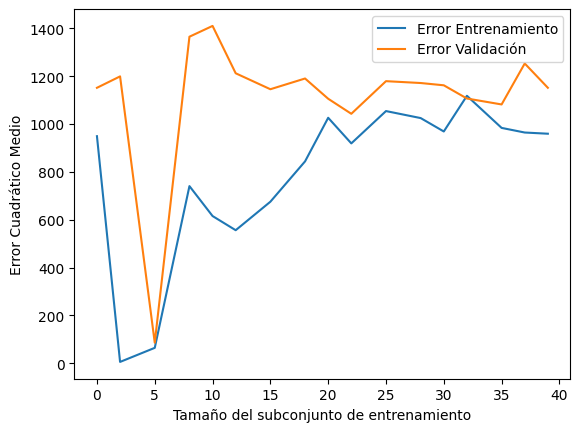

In [9]:
tamanios = [2, 5, 8, 10, 12, 15, 18, 20, 22, 25, 28, 30, 32, 35, 37, 39]

warnings.filterwarnings("ignore")
errores_entrenamiento = []
errores_validacion = []

for size in tamanios:
    errores_train = []
    errores_val = []
    for _ in range(100):
        X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=size, random_state=2102)
        modelo = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=100000, random_state=2102)
        modelo.fit(X_train_sub, y_train_sub)
        errores_train.append(mean_squared_error(y_train_sub, modelo.predict(X_train_sub)))
        errores_val.append(mean_squared_error(y_val, modelo.predict(X_val)))
    errores_entrenamiento.append(sum(errores_train) / len(errores_train))
    errores_validacion.append(sum(errores_val) / len(errores_val))

errores_entrenamiento.insert(0, mse_train)
errores_validacion.insert(0, mse_val)
tamanios.insert(0, 0)

plt.plot(tamanios, errores_entrenamiento, label='Error Entrenamiento')
plt.plot(tamanios, errores_validacion, label='Error Validación')
plt.xlabel('Tamaño del subconjunto de entrenamiento')
plt.ylabel('Error Cuadrático Medio')
plt.legend()
plt.show()

Vemos en el eje de las X el número de muestras que se usó para entrenar al modelo. Y en el eje Y vemos elvalor del error cuadrático medio (MSE). Entre menor sea el error mejor ajuste va a tener el modelo.

El error de entrenamiento (azul) es  el MSE en el conjunto de entrenamiento. Vemos que conforme incrementa el tamaño del subconjunto de etrenamiento más se estabiliza.


El error de validación (naranja) vemos que conforme aumenta el tamaño del subconjunto de entrenamiento el error de validación se estabiliza un poco más.

Vemos que con 5 muestras es el error más bajo que marca, mientras que aproximadamente en el rango entre 20 y 30 es cuendo comienza a estabilizarse un poco más.

Estos resultados nos sugieren que podemos mejorar el modelo.

Definí el mejor tamaño para la muestra como 30 ya que era el mejor numero para este caso. y despues entrenamos un modelo final utilizando el tamaño de muestra óptimo previamente determinado para que sean las cantidades optimas de prueba

In [10]:
mejor_tamanio = 30
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=mejor_tamanio, random_state=2102)
modelo_final = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=2102)
modelo_final.fit(X_train_sub, y_train_sub)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=1000000,
             random_state=2102)

Calculé los MSE en los conjuntos de entrenamiento, validación y prueba para el modelo final, lo que permitirá comparar su rendimiento con el modelo base.

In [11]:

mse_final_train = mean_squared_error(y_train_sub, modelo_final.predict(X_train_sub))
mse_final_val = mean_squared_error(y_val, modelo_final.predict(X_val))
mse_final_test = mean_squared_error(y_test, modelo_final.predict(X_test))

print("MSE Entrenamiento con 30:", mse_final_train)
print("MSE Validación con 30:", mse_final_val)
print("MSE Prueba con 30:",mse_final_test)

MSE Entrenamiento con 30: 968.9990762895238
MSE Validación con 30: 1162.0057413244474
MSE Prueba con 30: 1377.2150903487359


Dado que previamente se habia seleccionado un entrenamiento con 30 muestras se realiza el entrenamiento de un modelo de regresión lineal con esta caracteristica.

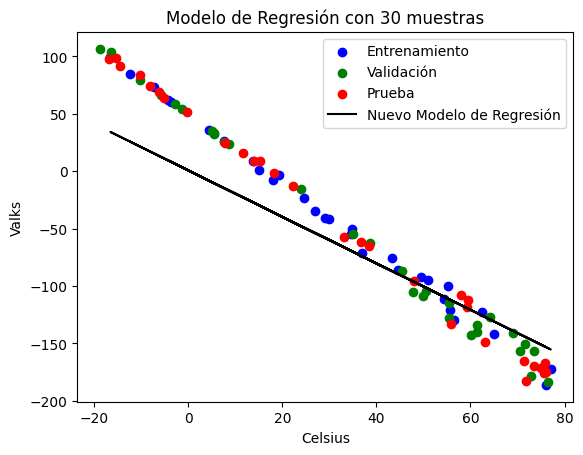

MSE Entrenamiento con 30 muestras: 968.9990762895238
MSE Validación Nuevo 30 muestras: 1162.0057413244474
MSE Prueba Nuevo 30 muestras: 1377.2150903487359


In [12]:
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=mejor_tamanio, random_state=2102)
modelo_nuevo = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=2102)
modelo_nuevo.fit(X_train_sub, y_train_sub)

mse_nuevo_train = mean_squared_error(y_train_sub, modelo_nuevo.predict(X_train_sub))
mse_nuevo_val = mean_squared_error(y_val, modelo_nuevo.predict(X_val))
mse_nuevo_test = mean_squared_error(y_test, modelo_nuevo.predict(X_test))

plt.scatter(X_train_sub, y_train_sub, color='blue', label='Entrenamiento')
plt.scatter(X_val, y_val, color='green', label='Validación')
plt.scatter(X_test, y_test, color='red', label='Prueba')
plt.plot(X_train_sub, modelo_nuevo.predict(X_train_sub), color='black', label='Nuevo Modelo de Regresión')
plt.legend()
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Modelo de Regresión con 30 muestras')
plt.show()

print("MSE Entrenamiento con 30 muestras:", mse_nuevo_train)
print("MSE Validación Nuevo 30 muestras:", mse_nuevo_val)
print("MSE Prueba Nuevo 30 muestras:", mse_nuevo_test)


Vemos con estos nuevos resultados que el modelo entrenado con 30 muestras nos brinda un ajuste razonable , lo cual vemos reflejado en los valores de MSE.

Decidí entrenar un nuevo modelo ahora con 5 muestras de entrenamiento ya que en la grafica de error de entrenamiento y error de validación , 5 muestras era la cantidad que más sentido hacia para intentarlo y tratar de tener un ajuste.

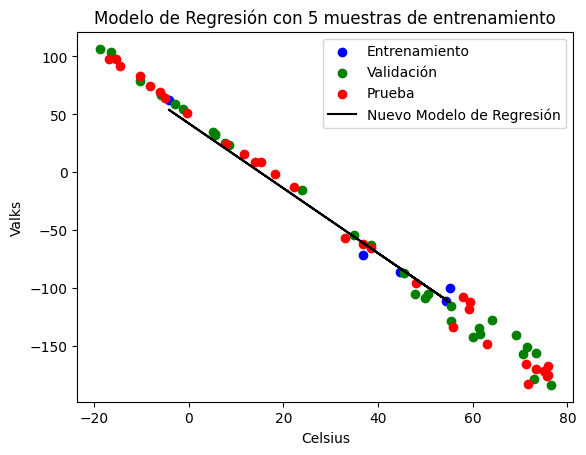

MSE Entrenamiento con 5 muestras: 64.68363083155336
MSE Validación  con 5 muestras: 86.03955553151816
MSE Prueba  con 5 muestras: 93.4707974428733


In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.6, random_state=2102)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2102)

reducido_tamanio = 5
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=reducido_tamanio, random_state=2102)
modelo_reducido = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=2102)
modelo_reducido.fit(X_train_sub, y_train_sub)

mse_reducido_train = mean_squared_error(y_train_sub, modelo_reducido.predict(X_train_sub))
mse_reducido_val = mean_squared_error(y_val, modelo_reducido.predict(X_val))
mse_reducido_test = mean_squared_error(y_test, modelo_reducido.predict(X_test))


plt.scatter(X_train_sub, y_train_sub, color='blue', label='Entrenamiento')
plt.scatter(X_val, y_val, color='green', label='Validación')
plt.scatter(X_test, y_test, color='red', label='Prueba')
plt.plot(X_train_sub, modelo_reducido.predict(X_train_sub), color='black', label='Nuevo Modelo de Regresión')
plt.legend()
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Modelo de Regresión con 5 muestras de entrenamiento')
plt.show()

print("MSE Entrenamiento con 5 muestras:", mse_reducido_train)
print("MSE Validación  con 5 muestras:", mse_reducido_val)
print("MSE Prueba  con 5 muestras:", mse_reducido_test)


Como vemos ahora tenemos un modelo entrenado con solo 5 muestras, a diferencia de los modelos anteriores en este vemos un mejor ajuste lo cual vemos reflejado en los valores bajos de los MSE. apesar de usar un conjunto de entrenamiento pequeño fue suficiente para obtener buenos y mejores .resulatos

Al comparar el modelo de 5 muestras (64.68) tenemos un MSE de Entrenamiento más bajo comparado con el modelo base (949.33) y el modelo de 30 muestras (968.99).

Si comparamos el MSE de validación tambien es más bajo el modelo de 5 muestras (86.09) comparado con el modelo base (1151.57) y el modelo de 30 muestras (1162.01).

Y al observar el MSE Prueba vemos que el modelo de 5 muestras (86.09) es menor que el modelo base (1364.49) y el modelo final (1377.22).

Asi que llegamos a la conclusión de que en este caso para este ejercicio el modelo entrenado con 5 muestras muestra el menor error cuadrático medio en todos los conjuntos (entrenamiento, validación y prueba) por lo que podria convertirse en el mejor de los 3 modelos.